###Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, timedelta
import datetime as dt
import warnings
import missingno as msno
warnings.filterwarnings('ignore') 
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as sm
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

###Importing the dataset 

In [2]:
cab_data = pd.read_csv('/content/drive/MyDrive/Project_Internship/Cab_Data.csv')
city_data = pd.read_csv('/content/drive/MyDrive/Project_Internship/City.csv')
customer_data = pd.read_csv('/content/drive/MyDrive/Project_Internship/Customer_ID.csv')
transaction_data = pd.read_csv('/content/drive/MyDrive/Project_Internship/Transaction_ID.csv')

###Reading the dataset

In [3]:
cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,08-01-2018,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,04-01-2018,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,05-01-2018,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,05-01-2018,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [4]:
city_data

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [5]:
customer_data

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [6]:
transaction_data

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


###Merge the dataset

In [7]:
#merge the data into one dataset to form a master dataset
#Part 1 = cab_data and transaction_data has common field as Transaction_ID
#Part 2 = Part 1 and customer_data has common field as customer_ID
#Master_dataset = Part 2 and city_Data has common field as City


Part_1 = pd.merge(cab_data, transaction_data, how = "left", on=["Transaction ID"])
Part_2 = pd.merge(Part_1, customer_data, how = "left", on=["Customer ID"])
Master_dataset = pd.merge(Part_2, city_data, how ="left", on=["City"])

In [8]:
Master_dataset

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,"814,885","24,701"
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,23,23327,"814,885","24,701"
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,33,8536,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,08-01-2018,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651,"418,859","127,001"
359388,10440104,04-01-2018,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528,"418,859","127,001"
359389,10440105,05-01-2018,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966,"418,859","127,001"
359390,10440106,05-01-2018,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,32,6423,"418,859","127,001"


###Check the null Values

In [9]:
cab_data.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [10]:
city_data.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [11]:
customer_data.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [12]:
transaction_data.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [13]:
Master_dataset.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

In [14]:
Master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  object 
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
 12  Population          359392 non-null  object 
 13  Users               359392 non-null  object 
dtypes: float64(3), int64(4), object(7)
memory usage: 41.1+ MB


###Replace the Space in each column


In [15]:
Master_dataset.columns=Master_dataset.columns.str.strip().str.lower().str.replace(' ', '_')


In [16]:
Master_dataset.head()

,transaction_id,date_of_travel,company,city,km_travelled,price_charged,cost_of_trip,customer_id,payment_mode,gender,age,income_(usd/month),population,users
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,"814,885","24,701"
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,"814,885","24,701"
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,"814,885","24,701"
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,"814,885","24,701"
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,"814,885","24,701"


###Add Columns of day, Weekday, Month, Year

In [17]:
Master_dataset['day'] = pd.DatetimeIndex(Master_dataset['date_of_travel']).day
Master_dataset['weekday'] = pd.DatetimeIndex(Master_dataset['date_of_travel']).weekday
Master_dataset['month'] = pd.DatetimeIndex(Master_dataset['date_of_travel']).month
Master_dataset['year'] = pd.DatetimeIndex(Master_dataset['date_of_travel']).year

###Calculation for Data visualation 

In [18]:
Master_dataset['profit_per_trip'] = Master_dataset['price_charged']-Master_dataset['cost_of_trip']
Master_dataset['profit_per_km'] = Master_dataset['profit_per_trip']/Master_dataset['km_travelled']
Master_dataset['price_per_km'] = Master_dataset['price_charged']-Master_dataset['km_travelled']
Master_dataset['cost_per_km'] = Master_dataset['cost_of_trip']/Master_dataset['km_travelled']

In [19]:
Master_dataset

,transaction_id,date_of_travel,company,city,km_travelled,price_charged,cost_of_trip,customer_id,payment_mode,gender,...,population,users,day,weekday,month,year,profit_per_trip,profit_per_km,price_per_km,cost_per_km
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,...,"814,885","24,701",1,0,8,2016,57.3150,1.882266,340.50,10.30
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,...,"814,885","24,701",1,2,6,2016,23.6660,0.826904,329.90,11.70
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,...,"814,885","24,701",1,0,2,2016,27.5680,3.049558,116.16,10.80
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,...,"814,885","24,701",1,4,7,2016,25.7980,0.777751,344.23,10.60
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,...,"814,885","24,701",1,1,3,2016,16.8440,1.929439,105.89,11.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,08-01-2018,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,...,"418,859","127,001",1,2,8,2018,5.8800,1.225000,64.44,13.20
359388,10440104,04-01-2018,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,...,"418,859","127,001",1,6,4,2018,6.9020,0.821667,105.35,12.72
359389,10440105,05-01-2018,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,...,"418,859","127,001",1,1,5,2018,87.4200,3.150270,409.32,12.60
359390,10440106,05-01-2018,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,...,"418,859","127,001",1,1,5,2018,32.1420,3.652500,137.39,12.96


###Exploratory Data Analysis

Descriptive Statistics

In [20]:
Master_dataset.describe()

,transaction_id,km_travelled,price_charged,cost_of_trip,customer_id,age,income_(usd/month),day,weekday,month,year,profit_per_trip,profit_per_km,price_per_km,cost_per_km
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937,15.972835,3.463461,7.156047,2017.045199,137.253198,6.083579,400.876057,12.681548
std,1.268058e+05,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482,8.503010,1.940577,3.413283,0.800239,160.311840,5.543493,264.240103,1.167944
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000,1.000000,0.000000,1.000000,2016.000000,-220.060000,-4.998235,13.620000,10.000000
25%,1.011081e+07,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000,9.000000,2.000000,4.000000,2016.000000,28.012000,2.000385,193.470000,12.000000
50%,1.022104e+07,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000,16.000000,4.000000,8.000000,2017.000000,81.962000,4.466809,362.240000,12.840000
75%,1.033094e+07,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000,23.000000,5.000000,10.000000,2018.000000,190.030000,9.170006,550.990000,13.680000
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000,31.000000,6.000000,12.000000,2018.000000,1463.966000,41.115556,2001.230000,14.400000


###Check for duplicate rows

In [21]:
duplicate = Master_dataset[Master_dataset.duplicated()]
duplicate

,transaction_id,date_of_travel,company,city,km_travelled,price_charged,cost_of_trip,customer_id,payment_mode,gender,...,population,users,day,weekday,month,year,profit_per_trip,profit_per_km,price_per_km,cost_per_km


There are no duplicate rows in Master dataset

###Data Visualation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc6d2770f10>,
      dtype=object)

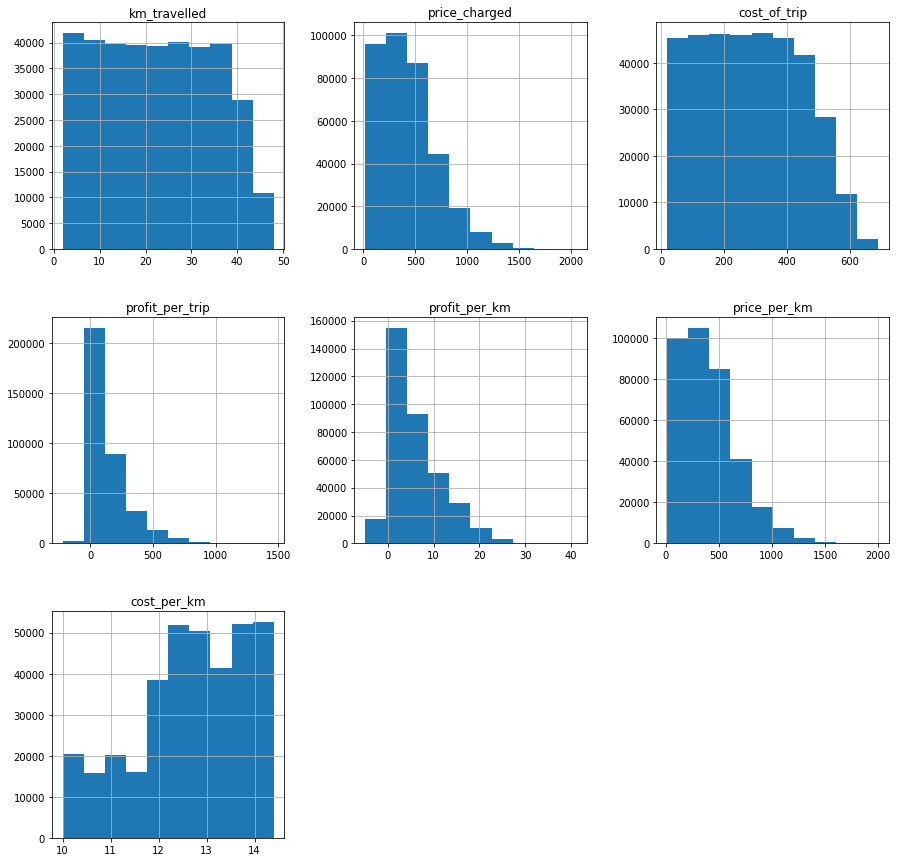

In [22]:
numerical = Master_dataset.select_dtypes(include=['float'])
numerical.hist(figsize=(15,15))

<Figure size 792x936 with 0 Axes>

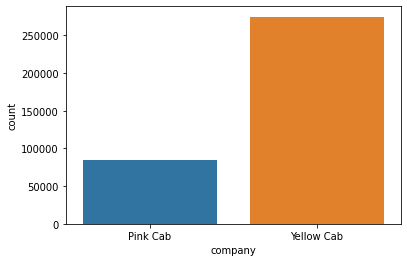

<Figure size 792x936 with 0 Axes>

In [23]:
categorical = Master_dataset.select_dtypes(include=['object'])
sns.countplot(data=categorical, x='company')
plt.figure(figsize=(11,13))


Pink cabs are less in demand and cost twice as much as yellow cabs.

In [24]:
gender_count = Master_dataset['gender'].value_counts()
gender_count

Male      205912
Female    153480
Name: gender, dtype: int64

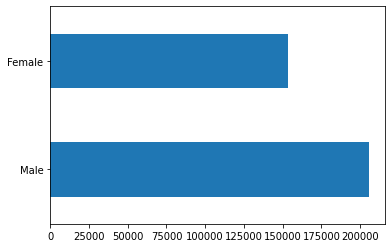

In [25]:
gender_count.plot.barh()

In [26]:
payment_count = Master_dataset['payment_mode'].value_counts()
payment_count

Card    215504
Cash    143888
Name: payment_mode, dtype: int64

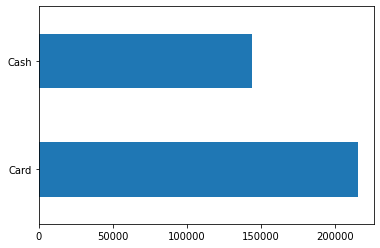

In [27]:
payment_count.plot.barh()

In [28]:
city_count = Master_dataset['city'].value_counts(ascending=True)
city_count

PITTSBURGH PA      1313
TUCSON AZ          1931
PHOENIX AZ         2064
SACRAMENTO CA      2367
NASHVILLE TN       3010
DENVER CO          3825
ORANGE COUNTY      3982
AUSTIN TX          4896
MIAMI FL           6454
DALLAS TX          7017
ATLANTA GA         7557
SEATTLE WA         7997
SILICON VALLEY     8519
SAN DIEGO CA      20488
BOSTON MA         29692
WASHINGTON DC     43737
LOS ANGELES CA    48033
CHICAGO IL        56625
NEW YORK NY       99885
Name: city, dtype: int64

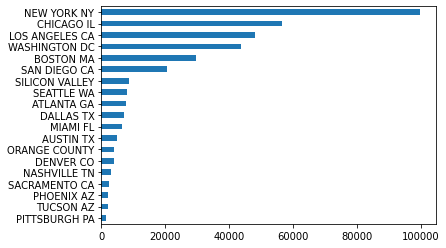

In [29]:
city_count.plot.barh()

In [30]:
Master_dataset['km_travelled'] = pd.to_numeric(Master_dataset['km_travelled'], errors='coerce')
Master_dataset['price_charged'] = pd.to_numeric(Master_dataset['price_charged'], errors='coerce')
Master_dataset['cost_of_trip'] = pd.to_numeric(Master_dataset['cost_of_trip'], errors='coerce')
Master_dataset['age'] = pd.to_numeric(Master_dataset['age'], errors='coerce')
Master_dataset['income_(usd/month)'] = pd.to_numeric(Master_dataset['income_(usd/month)'], errors='coerce')
Master_dataset.to_csv('Master_dataset.csv', sep=';')
Master_dataset=pd.read_csv("Master_dataset.csv" , sep=';')
Master_dataset.head(3)
Master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          359392 non-null  int64  
 1   transaction_id      359392 non-null  int64  
 2   date_of_travel      359392 non-null  object 
 3   company             359392 non-null  object 
 4   city                359392 non-null  object 
 5   km_travelled        359392 non-null  float64
 6   price_charged       359392 non-null  float64
 7   cost_of_trip        359392 non-null  float64
 8   customer_id         359392 non-null  int64  
 9   payment_mode        359392 non-null  object 
 10  gender              359392 non-null  object 
 11  age                 359392 non-null  int64  
 12  income_(usd/month)  359392 non-null  int64  
 13  population          359392 non-null  object 
 14  users               359392 non-null  object 
 15  day                 359392 non-nul

###City Analysis

In [31]:
city_analysis = Master_dataset.groupby('city')
city_analysis['company'].value_counts().unstack()

company,Pink Cab,Yellow Cab
city,,
ATLANTA GA,1762,5795
AUSTIN TX,1868,3028
BOSTON MA,5186,24506
CHICAGO IL,9361,47264
DALLAS TX,1380,5637
DENVER CO,1394,2431
LOS ANGELES CA,19865,28168
MIAMI FL,2002,4452
NASHVILLE TN,1841,1169


Newyork city in Yellow cab company has high users and next high users is in Chicago IL. Whereas the pink cab company has low number of users compared to yellow cab.

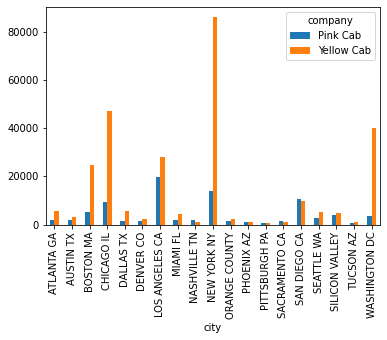

In [32]:
pd.crosstab(index=Master_dataset['city'],columns=Master_dataset['company']).plot(kind='bar')
plt.show()

Cross tab visulation shows the results of which city uses the more customers towards the yellow cab

###Payment mode analysis

In [33]:
Payment_mode = pd.crosstab(index=Master_dataset['payment_mode'],columns=Master_dataset['company'],margins=True)
Payment_mode

company,Pink Cab,Yellow Cab,All
payment_mode,,,
Card,50719,164785,215504
Cash,33992,109896,143888
All,84711,274681,359392


Comparitvely Card payment is much high in yellow cab than in pink cab. yellow cab Cash payment little high compared to pink cab.

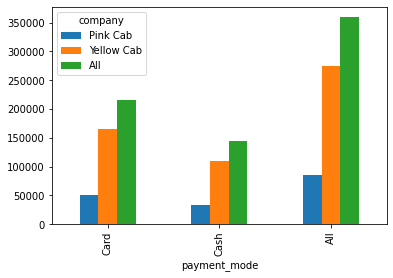

In [34]:
Payment_mode.plot(kind='bar')
plt.show()

###Gender Mode Analysis

In [35]:
Gender_mode = pd.crosstab(index=Master_dataset['company'],columns=Master_dataset['gender'],margins=True)
Gender_mode

gender,Female,Male,All
company,,,
Pink Cab,37480,47231,84711
Yellow Cab,116000,158681,274681
All,153480,205912,359392


With this gender variation users yellow cab has been used by more male and female compared to pink cab users of male and female.
Male Gender uses more cab compared to female gender.

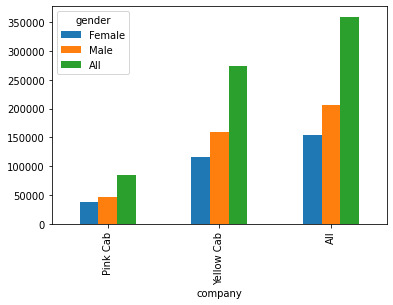

In [36]:
Gender_mode.plot(kind='bar')
plt.show()

###Age Analysis

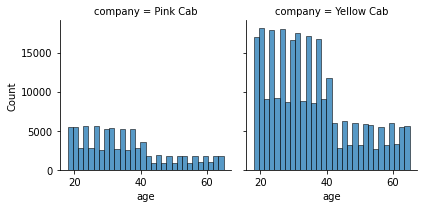

In [37]:
age_analysis = sns.FacetGrid(Master_dataset, col = "company")
age_analysis.map(sns.histplot, "age", bins = 30)
plt.show()

High number of users in yellow cab and pink cab are age between 20-40

###Price Charged Analysis

1. Hypothesis
   * There is difference between the price of the two company cab?




In [38]:
type_of_company = Master_dataset.groupby("company")
type_of_company.mean().loc[:,["price_charged"]]

,price_charged
company,
Pink Cab,310.800856
Yellow Cab,458.181990


   Yellow cab charges the high amount than pink cab 

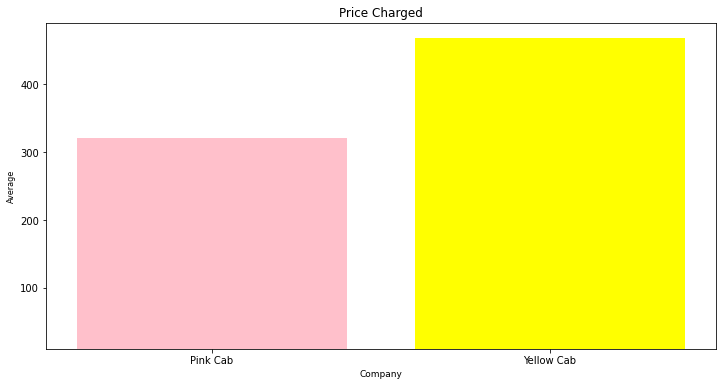

In [39]:
plt.figure(figsize=(12,6))
plt.bar(type_of_company.mean().index,type_of_company.mean()["price_charged"],color=["pink","yellow"],bottom=10)
plt.xlabel("Company",fontsize=9)
plt.ylabel("Average",fontsize=8)
plt.title("Price Charged",fontsize=12)
plt.savefig("price_charged.png",dpi=100)
plt.show()

###Profit Analysis

2. Hypothesis 
      * There is difference between in profit per trip by two cab?

In [40]:
type_of_company.mean().loc[:,["profit_per_trip"]]

,profit_per_trip
company,
Pink Cab,62.652174
Yellow Cab,160.259986


Yellow cab yeilds 100 more than the pink cab

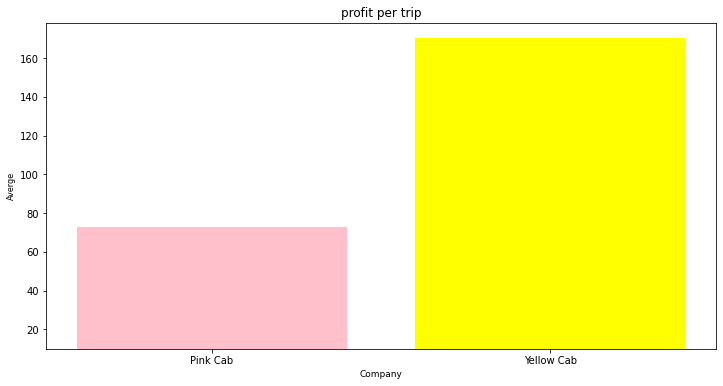

In [41]:
plt.figure(figsize=(12,6))
plt.bar(type_of_company.mean().index,type_of_company.mean()["profit_per_trip"],color=["pink","yellow"],bottom=10)
plt.xlabel("Company",fontsize=9)
plt.ylabel("Averge",fontsize=8)
plt.title("profit per trip",fontsize=12)
plt.savefig("profit_per_trip.png",dpi=100)
plt.show()

###Income Analysis

In [42]:
type_of_company.mean().loc[:,["income_(usd/month)"]]

,income_(usd/month)
company,
Pink Cab,15059.047137
Yellow Cab,15045.669817


Pink cab yeilds 10% much than the yellow cab 

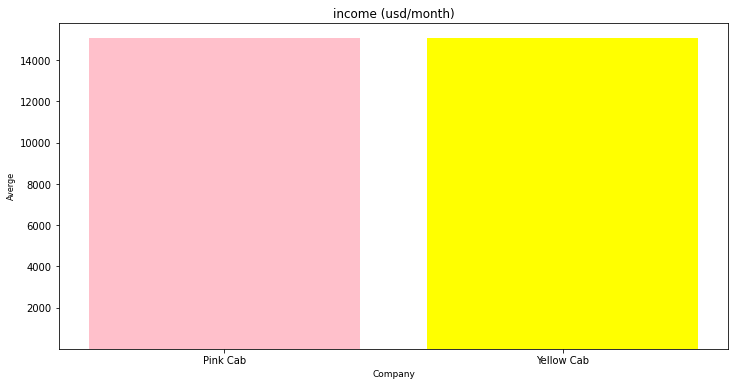

In [43]:
plt.figure(figsize=(12,6))
plt.bar(type_of_company.mean().index,type_of_company.mean()["income_(usd/month)"],color=["pink","yellow"],bottom=10)
plt.xlabel("Company",fontsize=9)
plt.ylabel("Averge",fontsize=8)
plt.title("income (usd/month)",fontsize=12)
plt.savefig("income_analysis.png",dpi=100)
plt.show()

###KM Travelled Analysis

3. Hypothesis
   * There is difference between in the KM travelled by two cab? 

In [44]:
type_of_company.mean().loc[:,["km_travelled"]]

,km_travelled
company,
Pink Cab,22.559917
Yellow Cab,22.569517


More or less same results for the two cab KM travelled 

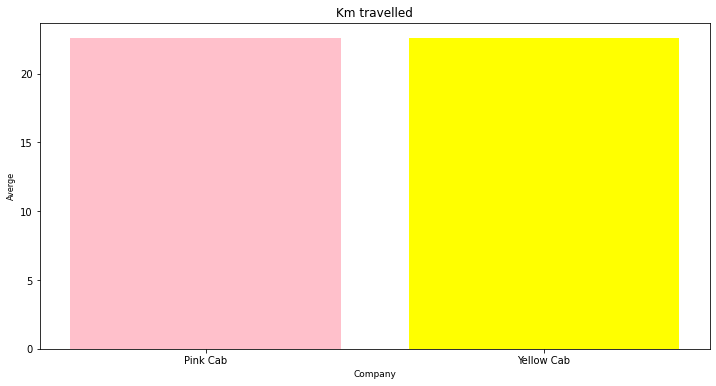

In [45]:
plt.figure(figsize=(12,6))
plt.bar(type_of_company.mean().index,type_of_company.mean()["km_travelled"],color=["pink","yellow"])
plt.xlabel("Company",fontsize=9)
plt.ylabel("Averge",fontsize=8)
plt.title("Km travelled",fontsize=12)
plt.savefig("Km_travelled.png", dpi=100)
plt.show()

###Profit per city/KM

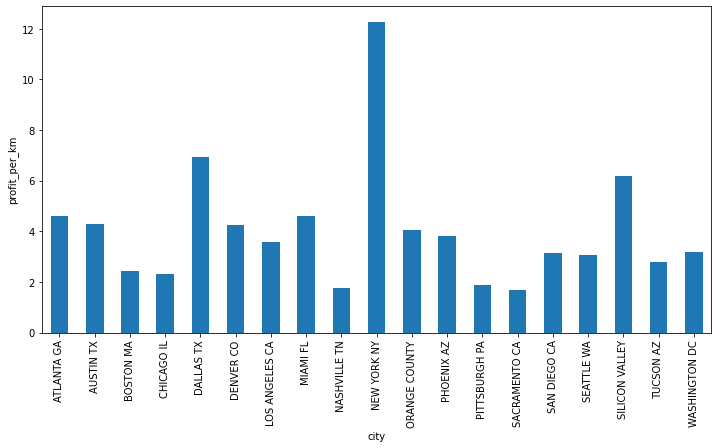

In [46]:
Master_dataset.groupby('city')['profit_per_km'].median().plot(kind='bar', figsize=(12,6), ylabel='profit_per_km');

The Newyork City has highest profit on per KM and Second highest is dalas TX, where the lowest profit on Per KM is Sacrmento CA

Distribution of year and company

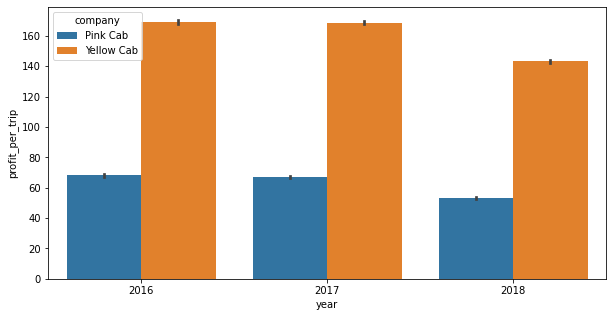

In [47]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='year', y="profit_per_trip", hue="company", data=Master_dataset)

Thus, profit per trip visualation shows that the 2016 and 2017 Yellow cab has higher profit whereas the 2018 it has fall down. In Pink cab Profit was stable in 2016 and 2017 and 2018 it has fall down

###Customer Per company analysis

In [48]:
print(len(Master_dataset.customer_id.unique()), 'customers')


46148 customers


In [49]:
Customer = Master_dataset.groupby(['customer_id','company', ]).size().to_frame('size').reset_index()
Customer

,customer_id,company,size
0,1,Pink Cab,4
1,1,Yellow Cab,25
2,2,Pink Cab,4
3,2,Yellow Cab,36
4,3,Pink Cab,6
...,...,...,...
72221,59998,Yellow Cab,6
72222,59999,Pink Cab,2
72223,59999,Yellow Cab,6
72224,60000,Pink Cab,4


More customer uses the yellow cab, but the same customers uses the both yellow cab and pink cab

In [50]:
Customer.groupby('company').sum()

,customer_id,size
company,,
Pink Cab,831664558,84711
Yellow Cab,1049163053,274681


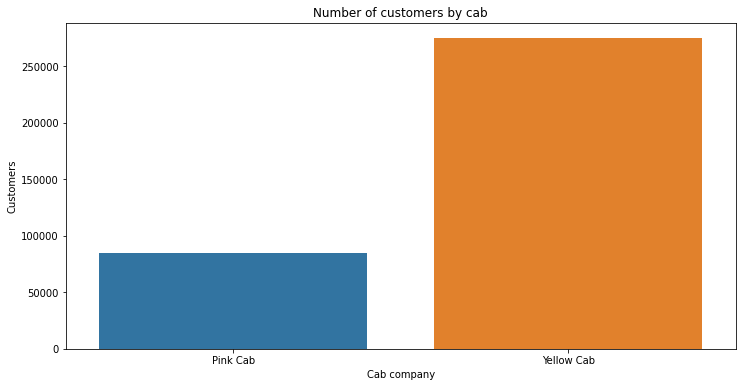

In [51]:
plt.figure(figsize=(12, 6))
sns.countplot(Master_dataset.company)

plt.title("Number of customers by cab")
plt.ylabel("Customers")
plt.xlabel("Cab company")
plt.show()

###Week Analysis

4. Hypothesis
  * Profit margin getting increased every week in cab



In [52]:
weekday_analysis = Master_dataset.groupby([Master_dataset['weekday'], 'company'])
(weekday_analysis[['km_travelled', 'profit_per_trip', 'profit_per_km','company']].median())

km_travelled  profit_per_trip  profit_per_km
weekday company                                                 
0       Pink Cab           22.05          34.3105       2.058884
        Yellow Cab         22.42          93.1312       5.103434
1       Pink Cab           22.61          35.6000       2.134995
        Yellow Cab         22.41          96.6506       5.391836
2       Pink Cab           22.26          36.4670       2.106509
        Yellow Cab         22.42          93.1888       5.149244
3       Pink Cab           22.40          36.0680       2.139563
        Yellow Cab         22.26          89.9904       5.025000
4       Pink Cab           22.66          45.9650       2.612900
        Yellow Cab         22.47         106.1260       5.792595
5       Pink Cab           22.31          46.1200       2.706624
        Yellow Cab         22.60         109.9228       5.876486
6       Pink Cab           22.54          47.7005       2.751732
        Yellow Cab         22.60         112.7820       6.159612

In weekends particulary,Profit on per trip getting Increased in yellow cab on the same side increase in km travelled

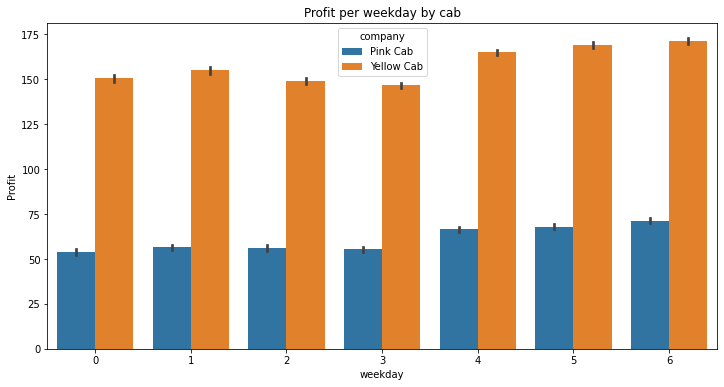

In [53]:
plt.figure(figsize=(12, 6))
sns.barplot(x = Master_dataset['weekday'] , y= Master_dataset['profit_per_trip'] , hue = Master_dataset['company'])

plt.title("Profit per weekday by cab")
plt.ylabel("Profit")
plt.xlabel("weekday")
plt.show()

###Seasonality Analysis

5. Hypothesis
    * There is any seasonality in profit margin for two cabs ?

In [54]:
Seasonality_analysis = Master_dataset.groupby(['month','company'])
(Seasonality_analysis[['km_travelled', 'profit_per_trip', 'profit_per_km']].median()).unstack()

km_travelled            profit_per_trip            profit_per_km  \
company     Pink Cab Yellow Cab        Pink Cab Yellow Cab      Pink Cab   
month                                                                      
1             22.355      22.54          41.935   114.6160      2.454020   
2             22.310      22.57          47.520   116.3060      2.736672   
3             23.520      22.22          52.398   109.8300      2.890560   
4             22.080      22.47          34.840   107.1488      2.184878   
5             22.000      22.23          30.260   126.4988      1.898216   
6             22.600      22.31          34.558   113.7192      1.999074   
7             22.260      22.66          34.030    85.4900      2.071250   
8             22.230      22.31          38.230    83.3244      2.269637   
9             22.440      22.42          36.803   106.8900      2.157562   
10            22.420      22.54          42.980    98.7100      2.514739   
11            22.420      22.61          43.768    83.9762      2.598498   
12            22.610      22.60          58.124    99.6280      3.268564   

                    
company Yellow Cab  
month               
1         6.074740  
2         6.051205  
3         6.010245  
4         5.971364  
5         6.777619  
6         5.966703  
7         4.656637  
8         4.618318  
9         5.650641  
10        5.537637  
11        4.671760  
12        5.509328

Yellow cab has the greater margin than the pink cab

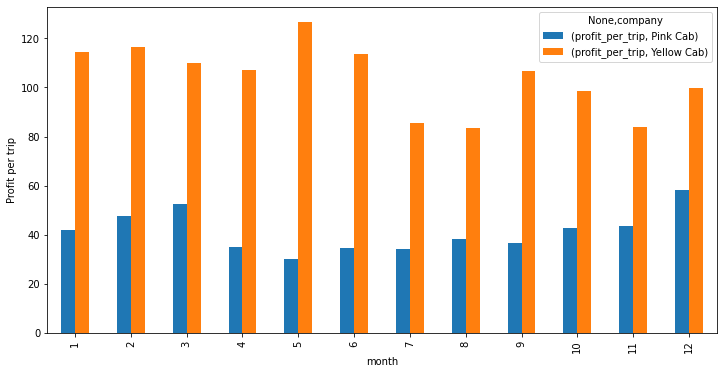

In [55]:
((Seasonality_analysis[['profit_per_trip']].median()).unstack()).plot(kind='bar', figsize=(12,6), ylabel='Profit per trip');


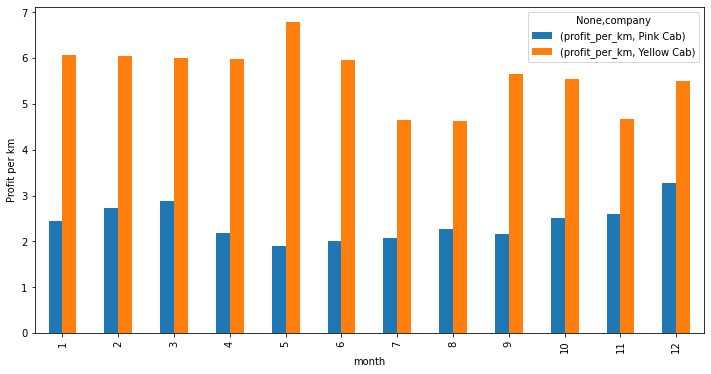

In [56]:
((Seasonality_analysis[['profit_per_km']].median()).unstack()).plot(kind='bar', figsize=(12,6), ylabel='Profit per km');


Profit is higher in may month 
But it got lower in july and august month on both profit per Km and trip

###Yearly Analysis

6. Hypothesis
    * Mean profit of each cab in year?

In [57]:
yearly_analysis = Master_dataset.groupby([Master_dataset['year'], Master_dataset['company']])['profit_per_trip'].mean().to_frame().reset_index()
yearly_analysis

,year,company,profit_per_trip
0,2016,Pink Cab,68.321819
1,2016,Yellow Cab,169.347821
2,2017,Pink Cab,67.070839
3,2017,Yellow Cab,168.817057
4,2018,Pink Cab,53.229689
5,2018,Yellow Cab,143.416122


In 2016 and 2017, the yellow cab has higher profit and pink cab remains same on both year. Whereas in 2018 there is decrease in yellow cab and pink cab

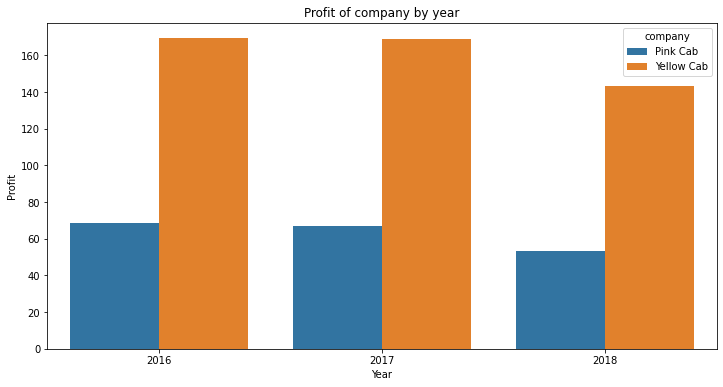

In [58]:
plt.figure(figsize=(12, 6))
sns.barplot(x = 'year' , y= 'profit_per_trip' , hue = 'company', data = yearly_analysis)

plt.title("Profit of company by year")
plt.ylabel("Profit")
plt.xlabel("Year")
plt.show()

7. Hypothesis
    * Mean price of two cab in each year?

In [59]:
Mean_price = Master_dataset.groupby([Master_dataset['year'], 'company'])['price_charged'].mean().to_frame().reset_index()
Mean_price

,year,company,price_charged
0,2016,Pink Cab,315.330113
1,2016,Yellow Cab,467.918301
2,2017,Pink Cab,315.907442
3,2017,Yellow Cab,466.639950
4,2018,Pink Cab,301.642530
5,2018,Yellow Cab,440.875558


In each year yellow cab is high and increased the price rates

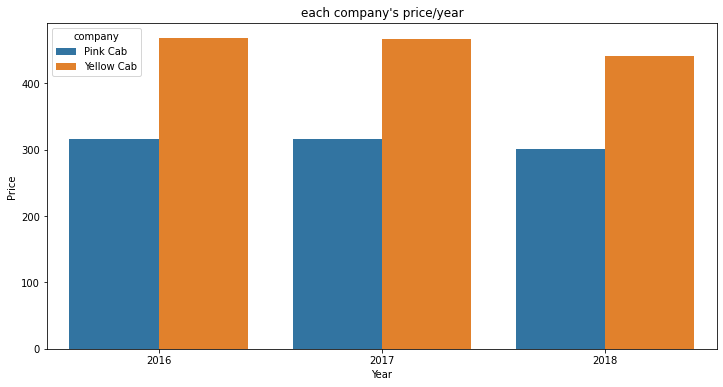

In [60]:
plt.figure(figsize=(12, 6))

sns.barplot(x = 'year' , y= 'price_charged' , hue = 'company', data = Mean_price)

plt.title("each company's price/year")
plt.ylabel("Price")
plt.xlabel("Year")
plt.show()

8. Hypothesis
    * which cab has maximum users every year?


In [61]:
Users_per_year = Master_dataset.groupby([Master_dataset['year'], 'company'])['customer_id'].count().to_frame().reset_index()
Users_per_year

,year,company,customer_id
0,2016,Pink Cab,25080
1,2016,Yellow Cab,82239
2,2017,Pink Cab,30321
3,2017,Yellow Cab,98189
4,2018,Pink Cab,29310
5,2018,Yellow Cab,94253


In 2017 Yellow cab has highest users.

###If there are Significant differences between the two groups. use inferential statistic T-test

In [62]:
import scipy.stats as stat
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind

sample_size = int((10/100)*359392) 
def T_test(a, b):
    sample_a = np.random.choice(a, sample_size)
    sample_b = np.random.choice(b, sample_size)
    ttest, p_value = ttest_ind(sample_a, sample_b, equal_var = False)
    print(f'p-value: {p_value}')
    if p_value < 0.05:    # alpha value is 0.05 or 5%
        print("Reject null hypothesis (H0)")
    else:
        print("Accept null hypothesis (H0)")

###KM Travelled

Hypothesis 

* H0 - KM Travelled by both cab are equal
* H1 - KM Travelled by both cab not equal

In [63]:
Master_dataset['km_travelled'].groupby(Master_dataset['company']).mean()


company
Pink Cab      22.559917
Yellow Cab    22.569517
Name: km_travelled, dtype: float64

In [64]:
T_test(Master_dataset[Master_dataset['company'] == 'Yellow Cab']['km_travelled'], Master_dataset[Master_dataset['company'] == 'Pink Cab']['km_travelled'])


p-value: 0.9795188897019187
Accept null hypothesis (H0)


###Price charged


Hypothesis 

* H0 - Price charged for both cabs are equal
* H1 - Price charged for both cabs not equal

In [65]:
Master_dataset['price_per_km'].groupby(Master_dataset['company']).mean()


company
Pink Cab      288.240939
Yellow Cab    435.612473
Name: price_per_km, dtype: float64

In [66]:
T_test(Master_dataset[Master_dataset['company'] == 'Yellow Cab']['price_per_km'], Master_dataset[Master_dataset['company'] == 'Pink Cab']['price_per_km'])


p-value: 0.0
Reject null hypothesis (H0)


###Cost

Hypothesis 

* H0 - cost for both cabs are equal
* H1 - cost for both cabs not equal

In [67]:
Master_dataset['cost_of_trip'].groupby(Master_dataset['company']).mean()


company
Pink Cab      248.148682
Yellow Cab    297.922004
Name: cost_of_trip, dtype: float64

In [68]:
T_test(Master_dataset[Master_dataset['company'] == 'Yellow Cab']['cost_of_trip'], Master_dataset[Master_dataset['company'] == 'Pink Cab']['cost_of_trip'])


p-value: 0.0
Reject null hypothesis (H0)


### Pearson Correlation Co-efficient

Measure the linear relationship between the two datasets. calculates the p-value for the testing non co-efficient and pearson correlation coefficient.

Hypothesis 

* H0 - KM Travelled and profit per trip are not equal
* H1 - KM Travelled and profir per trip are equal

In [69]:
KMTrave = Master_dataset['km_travelled']
ProfitPer = Master_dataset['profit_per_trip']

In [70]:
from scipy.stats import pearsonr

stat, p = pearsonr(KMTrave, ProfitPer)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Km travelled and profit per trip are not related')
else:
    print('Km travelled and profit per trip are related')

stat=0.463, p=0.000
Km travelled and profit per trip are related


Hypothesis 

* H0 - No relation between age and profit per trip.
* H1 - There is relation between age and profit per trip.

In [73]:
age_hypo = Master_dataset['age']
profit_hypo= Master_dataset['profit_per_trip']
age_hypo
profit_hypo

0         57.3150
1         23.6660
2         27.5680
3         25.7980
4         16.8440
           ...   
359387     5.8800
359388     6.9020
359389    87.4200
359390    32.1420
359391    13.9608
Name: profit_per_trip, Length: 359392, dtype: float64

In [72]:
from scipy.stats import pearsonr

stat, p = pearsonr(age_hypo, profit_hypo)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('age and profit are not related')
else:
    print('age and profit are related')

stat=-0.005, p=0.002
age and profit are related


Hypothesis 

* H0 - No relation between age, cost of trip and price charged.
* H1 - There is relation between age, cost of trip and price charged.

In [74]:
price_hypo = Master_dataset['price_charged']
cost_hypo = Master_dataset['cost_of_trip']

In [75]:
from scipy.stats import pearsonr

stat, p = pearsonr(price_hypo, cost_hypo)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('price charged and cost_of_trip are not related')
else:
    print('price charged and cost_of_trip are related')

stat=0.860, p=0.000
price charged and cost_of_trip are related


Recommendation 

* Yellow cab is the best decision to invest:
 
* Yellow cab has more profit and big share in last over years and also in terms of rides.

* It has high number of customer particulary in 2017.

* Customer uses the yellow and pink cab mostly are aged between 20-40

* Big cities with huge population are prefer yellow cab

* There are some seasonality because both cabs recorded deflation in July and august on profit per Km and trip.

* Yellow cab has always higher profit in all these days compared to pink cab.

* Most customers used Both card and cash payment for pink cabs, Wheareas most card payment has been done by yellow cab.